# TF 1.13.1 installation

In [6]:
# install tensorflow version 1.13.1 as per assignment requirement
!pip install tensorflow==1.13.1

# check tensorflow version to make sure it is 1.13.1
import tensorflow as tf
print(tf.__version__)

1.13.1


# Data Exploration

(array([], dtype=int64),)
(array([], dtype=int64),)
6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64
5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64


<AxesSubplot:>

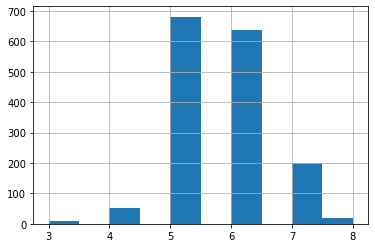

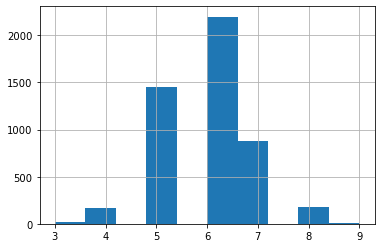

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# logging.getLogger('matplotlib.font_manager').disabled = True

red_wine = pd.read_csv("winequality-red.csv", sep=';')
white_wine = pd.read_csv("winequality-white.csv", sep=';')

print(np.where(red_wine.isnull().any())) # missing values check
print(np.where(white_wine.isnull().any())) 

print(white_wine["quality"].value_counts())
print(red_wine["quality"].value_counts())

w_wine_dict = white_wine["quality"].value_counts().to_dict()
r_wine_dict = red_wine["quality"].value_counts().to_dict()

plt.figure()
red_wine["quality"].hist()

plt.figure()
white_wine["quality"].hist()

# Combine and normalize data


In [9]:
from sklearn import preprocessing
from sklearn.model_selection import KFold, StratifiedKFold, StratifiedShuffleSplit, train_test_split
from sklearn.metrics import mean_squared_error

import math

red_wine = pd.read_csv("winequality-red.csv", sep=';')
white_wine = pd.read_csv("winequality-white.csv", sep=';')
concat_df = pd.concat([red_wine, white_wine])

dataset_params = {
  "total_dp": 4000,
  "train": 0.7,
  "valid": 0.2,
  "test": 0.1,    
}

# Normalize df values
columns = list(concat_df.columns)
min_max = preprocessing.MinMaxScaler()
normalized = min_max.fit_transform(concat_df.values)
concat_df_norm = pd.DataFrame(normalized, columns = columns)

# Include all minority classes into the final df
quality_classes = sorted(concat_df_norm.quality.unique().tolist())
final_df = pd.DataFrame()
tmp_list = []

for i in quality_classes:
  if concat_df_norm.quality.value_counts()[i] <= 1200:
    dataset_params["total_dp"] -= int(concat_df_norm.quality.value_counts()[i])
    tmp_list.append(concat_df_norm.loc[concat_df_norm["quality"] == i])
    concat_df_norm.drop(concat_df_norm.loc[concat_df_norm.quality==i].index, inplace=True)

remaining_classes = concat_df_norm.quality.unique().tolist()
sample_per_class = int((dataset_params["total_dp"])/len(remaining_classes))

# Adding a balanced amount of each remaining class into the dataset 
for quality in concat_df_norm.quality.unique().tolist():
  tmp_df = concat_df_norm.loc[concat_df_norm["quality"]== quality]
  tmp_list.append(tmp_df.sample(sample_per_class))

final_df = pd.concat(tmp_list) 

# Splitting datasets
final_train_df, final_test_df = train_test_split(final_df, train_size = 0.9, test_size = dataset_params["test"]) # Train test split
final_train_df, final_valid_df = train_test_split(final_train_df, train_size = dataset_params["train"], test_size = dataset_params["valid"]) # Train validation split

# Round the quality column to 2dp
final_train_df.quality = final_train_df.quality
final_valid_df.quality = final_valid_df.quality
final_test_df.quality = final_test_df.quality

# Shuffle up dataframes
final_train_df = final_train_df.sample(frac=1)
final_valid_df = final_valid_df.sample(frac=1)
final_test_df = final_test_df.sample(frac=1)

C:\Users\hfyjc3\.conda\envs\tensorflow_1\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


# Network


In [10]:
class some_network(tf.keras.Model):

  def __init__(self, n_input, n_output):
    super(some_network, self).__init__()

    # set the weights and biases
    self.w1_1 = tf.Variable(initial_value= tf.random_normal([n_input, 10]), trainable=True)
    self.w2_1 = tf.Variable(initial_value= tf.random_normal([10, 5]), trainable=True)
    self.w3_1 = tf.Variable(initial_value= tf.random_normal([5, n_output]), trainable=True)

    self.b1_1 = tf.Variable(initial_value= tf.random_normal([10]), trainable=True)
    self.b2_1 = tf.Variable(initial_value= tf.random_normal([5]), trainable=True)
    self.b3_1 = tf.Variable(initial_value= tf.random_normal([n_output]), trainable=True)

  def call(self, input_d):
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(input_d, self.w1_1), self.b1_1))
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, self.w2_1), self.b2_1))
    out = tf.nn.sigmoid(tf.add(tf.matmul(layer_2, self.w3_1), self.b3_1))

    return out


# Parameters


In [11]:
# Network parameters
n_hidden1 = 10
n_hidden2 = 10
n_input = 11
n_output = 1

#Learning parameters
learning_constants = [0.04, 0.05, 0.06, 0.07]
learning_constant = 0.06
number_epochs = 400
cross_val_epochs = 150
batch_size= 500

# Testing different LR 


Learning rate: 0.04
Epoch 10/200		MSE: 0.05519147589802742
Epoch 20/200		MSE: 0.02852768450975418
Epoch 30/200		MSE: 0.02970975637435913
Epoch 40/200		MSE: 0.028862392529845238
Epoch 50/200		MSE: 0.02717408537864685
Epoch 60/200		MSE: 0.026039157062768936
Epoch 70/200		MSE: 0.025026030838489532
Epoch 80/200		MSE: 0.02394985407590866
Epoch 90/200		MSE: 0.02286429889500141
Epoch 100/200		MSE: 0.02192324586212635
Epoch 110/200		MSE: 0.021244030445814133
Epoch 120/200		MSE: 0.020817775279283524
Epoch 130/200		MSE: 0.020535696297883987
Epoch 140/200		MSE: 0.020311206579208374
Epoch 150/200		MSE: 0.020121313631534576
Epoch 160/200		MSE: 0.01996733620762825
Epoch 170/200		MSE: 0.0198476891964674
Epoch 180/200		MSE: 0.019756542518734932
Epoch 190/200		MSE: 0.019687574356794357
Epoch 200/200		MSE: 0.019634826108813286


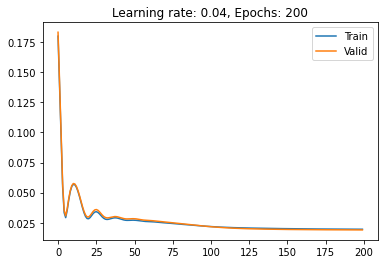

Learning rate: 0.05
Epoch 10/200		MSE: 0.03430519625544548
Epoch 20/200		MSE: 0.030972041189670563
Epoch 30/200		MSE: 0.02935665287077427
Epoch 40/200		MSE: 0.028344394639134407
Epoch 50/200		MSE: 0.02725895121693611
Epoch 60/200		MSE: 0.025650620460510254
Epoch 70/200		MSE: 0.023540165275335312
Epoch 80/200		MSE: 0.02160041593015194
Epoch 90/200		MSE: 0.020626695826649666
Epoch 100/200		MSE: 0.02019907720386982
Epoch 110/200		MSE: 0.019801611080765724
Epoch 120/200		MSE: 0.0196222010999918
Epoch 130/200		MSE: 0.019532162696123123
Epoch 140/200		MSE: 0.019484318792819977
Epoch 150/200		MSE: 0.019444940611720085
Epoch 160/200		MSE: 0.019410721957683563
Epoch 170/200		MSE: 0.019379831850528717
Epoch 180/200		MSE: 0.019348420202732086
Epoch 190/200		MSE: 0.01931469701230526
Epoch 200/200		MSE: 0.019277729094028473


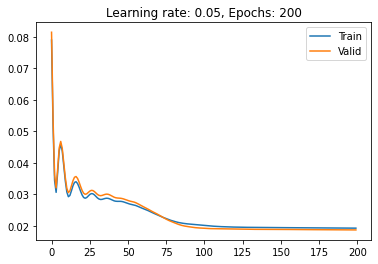

Learning rate: 0.06
Epoch 10/200		MSE: 0.028388483449816704
Epoch 20/200		MSE: 0.028360679745674133
Epoch 30/200		MSE: 0.027315042912960052
Epoch 40/200		MSE: 0.025592496618628502
Epoch 50/200		MSE: 0.0238112211227417
Epoch 60/200		MSE: 0.022649141028523445
Epoch 70/200		MSE: 0.021637842059135437
Epoch 80/200		MSE: 0.021036893129348755
Epoch 90/200		MSE: 0.02063681185245514
Epoch 100/200		MSE: 0.02031843177974224
Epoch 110/200		MSE: 0.020058346912264824
Epoch 120/200		MSE: 0.019862953573465347
Epoch 130/200		MSE: 0.019724862650036812
Epoch 140/200		MSE: 0.019629474729299545
Epoch 150/200		MSE: 0.019564412534236908
Epoch 160/200		MSE: 0.019518306478857994
Epoch 170/200		MSE: 0.019481973722577095
Epoch 180/200		MSE: 0.019449574872851372
Epoch 190/200		MSE: 0.019417807459831238
Epoch 200/200		MSE: 0.019384630024433136


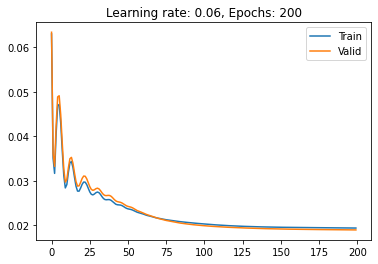

Learning rate: 0.07


KeyboardInterrupt: ignored

In [11]:
final_train_data = np.array(final_train_df.drop(columns="quality"))
final_train_label = np.expand_dims(np.array(final_train_df["quality"]),axis=(1))

final_valid_data = np.array(final_valid_df.drop(columns="quality"))
final_valid_label = np.expand_dims(np.array(final_valid_df["quality"]),axis=(1))

final_test_data = np.array(final_test_df.drop(columns="quality"))
final_test_label = np.expand_dims(np.array(final_test_df["quality"]),axis=(1))

# Defining the input and the output
X = tf.placeholder("float", [None, n_input])
Y = tf.placeholder("float", [None, n_output])

# Cross Validation
kf = KFold(n_splits=10,shuffle=True)

record_dict = {}
valid_loss = {}

for lr in learning_constants:
  print(f"Learning rate: {lr}")
  record_dict[f"lr_{lr}"] = []
  valid_loss[f"lr_{lr}"] = []
  epoch_holder = []
  training_loss = []
  validation_loss = []

  # Create model
  neural_network = some_network(n_input,n_output)

  # Define loss and optimizer
  loss_fn = tf.reduce_mean(tf.keras.losses.MeanSquaredError()(neural_network(X),Y))
  optimizer = tf.train.AdamOptimizer(lr).minimize(loss_fn)

  #Initializing the variables
  init = tf.global_variables_initializer()

  # Training model
  with tf.Session() as sess:
      sess.run(init)

      for epoch in range(200):
        epoch_holder.append(epoch)
        sess.run(optimizer, feed_dict={X: final_train_data, Y: final_train_label})

        # if ((epoch+1) % 10 == 0):
        #   pred = tf.nn.relu(neural_network(X))
        #   loss_fn = tf.keras.losses.MeanSquaredError()(pred,Y)
        #   loss = loss_fn.eval({X:final_train_data, Y:final_train_label})
        #   valid_loss[f"lr_{lr}"].append(loss)  
        #   print(f"Average loss at {epoch+1} epochs: {loss}")

        pred = tf.nn.relu(neural_network(X))
        loss_fn = tf.keras.losses.MeanSquaredError()(pred,Y)
        loss = loss_fn.eval({X:final_train_data, Y:final_train_label})

        if ((epoch+1) % 10 == 0):
          print(f"Epoch {epoch+1}/200\t\tMSE: {loss}")

        training_loss.append(loss)

        # Calculate MSE here
        # Perform validation testing
        pred = tf.nn.relu(neural_network(X))
        val_loss = loss_fn.eval({X:  final_valid_data, Y:final_valid_label})
        validation_loss.append(val_loss)
        # print(f"Validation set MSE: {val_loss}\n")
        record_dict[f"lr_{lr}"].append(val_loss)  

      plt.figure()
      plt.plot(epoch_holder, training_loss, label='Train')
      plt.plot(epoch_holder, validation_loss, label='Valid')
      plt.title(f"Learning rate: {lr}, Epochs: {200}")
      plt.legend()
      plt.show()


In [59]:
tmp_list = []
for i in record_dict:
  # print(record_dict[i])
  print(f"Average MSE for {i}: {sum(record_dict[i])/len(record_dict[i])}")
  tmp_list = [math.sqrt(j) for j in record_dict[i]]
  print(f"Average RMSE for {i}: {sum(tmp_list)/len(tmp_list)}\n")

Average MSE for lr_0.04: 0.026607519779354334
Average RMSE for lr_0.04: 0.1593836220860888

Average MSE for lr_0.05: 0.023554731076583266
Average RMSE for lr_0.05: 0.1519822984472426

Average MSE for lr_0.06: 0.022761709224432707
Average RMSE for lr_0.06: 0.1498105493292473

Average MSE for lr_0.07: 0.1366479553282261
Average RMSE for lr_0.07: 0.3536858362523559



# Cross Validation

In [17]:
cross_val_df = pd.concat([final_train_df, final_valid_df])
cross_val_df = cross_val_df.sample(frac=1)

cross_val_df_data = cross_val_df.drop(columns=["quality"])
cross_val_df_label = cross_val_df["quality"]

# # Defining the input and the output
X = tf.placeholder("float", [None, n_input])
Y = tf.placeholder("float", [None, n_output])

# Cross Validation
kf = KFold(n_splits=10,shuffle=True)

cv_dict = {}

folds = 1
fold_accs = []

for train_index, test_index in kf.split(X=cross_val_df):
  epoch_holder = []

  print(f"Learning rate: {learning_constant}")
  # cv_dict[f"Fold_{folds}"] = []
  cv_data_train, cv_data_valid = cross_val_df_data.iloc[train_index], cross_val_df_data.iloc[test_index]
  cv_label_train, cv_label_valid = cross_val_df_label.iloc[train_index], cross_val_df_label.iloc[test_index]

  cv_data_train = np.array(cv_data_train)
  cv_data_valid = np.array(cv_data_valid)

  cv_label_train = np.expand_dims(np.array(cv_label_train),axis=(1))
  cv_label_valid = np.expand_dims(np.array(cv_label_valid), axis=(1))

  print("="*20)
  print(f"Fold: {folds}")
  print("="*20)

  # Create model
  neural_network = some_network(n_input,n_output)

  # Define loss and optimizer
  loss_fn = tf.reduce_mean(tf.keras.losses.MeanSquaredError()(neural_network(X),Y))

  optimizer = tf.train.AdamOptimizer(learning_constant).minimize(loss_fn)

  #Initializing the variables
  init = tf.global_variables_initializer()

  # Training model
  with tf.Session() as sess:
      sess.run(init)

      for epoch in range(cross_val_epochs):
        epoch_holder.append(epoch)
        sess.run(optimizer, feed_dict={X: cv_data_train, Y: cv_label_train})

        if ((epoch+1) % 10 == 0):
          pred = tf.nn.relu(neural_network(X))
          loss_fn = tf.keras.losses.MeanSquaredError()(pred,Y)
          loss = loss_fn.eval({X:cv_data_train, Y:cv_label_train})
          print(f"Epoch {epoch+1}/{cross_val_epochs}\t\tMSE: {loss}")

      # Test on validation set
      pred = tf.nn.relu(neural_network(X))
      loss = loss_fn.eval({X: cv_data_valid, Y:cv_label_valid})
      print(f"Validation loss: {loss}")
      fold_accs.append(loss)
      # cv_dict[f"Fold_{folds}"].append(loss)  

  folds+=1  

Learning rate: 0.06
Fold: 1
Epoch 10/150		MSE: 0.03219308331608772
Epoch 20/150		MSE: 0.0292624831199646
Epoch 30/150		MSE: 0.02606225199997425
Epoch 40/150		MSE: 0.02347458153963089
Epoch 50/150		MSE: 0.02150367945432663
Epoch 60/150		MSE: 0.020405152812600136
Epoch 70/150		MSE: 0.019926805049180984
Epoch 80/150		MSE: 0.01949833147227764
Epoch 90/150		MSE: 0.019239645451307297
Epoch 100/150		MSE: 0.019118690863251686
Epoch 110/150		MSE: 0.019061828032135963
Epoch 120/150		MSE: 0.019029170274734497
Epoch 130/150		MSE: 0.019006649032235146
Epoch 140/150		MSE: 0.018988534808158875
Epoch 150/150		MSE: 0.01897309347987175
Validation loss: 0.018753433600068092
Learning rate: 0.06
Fold: 2
Epoch 10/150		MSE: 0.02876828983426094
Epoch 20/150		MSE: 0.025915632024407387
Epoch 30/150		MSE: 0.02301088161766529
Epoch 40/150		MSE: 0.02119363285601139
Epoch 50/150		MSE: 0.020408345386385918
Epoch 60/150		MSE: 0.019794518128037453
Epoch 70/150		MSE: 0.019354715943336487
Epoch 80/150		MSE: 0.0191002935

In [29]:
print("RMSE of each fold in 10-fold cross validation")
print(pd.Series(np.sqrt(fold_accs)))
rmse_fold_accs = np.mean(np.sqrt(fold_accs))
print(f"\nAverage RMSE of all folds: {rmse_fold_accs}")

RMSE of each fold in 10-fold cross validation
0    0.136943
1    0.141364
2    0.144312
3    0.138460
4    0.136431
5    0.135085
6    0.156552
7    0.127677
8    0.141026
9    0.176540
dtype: float32

Average RMSE of all folds: 0.14343900978565216


In [14]:
cv_df = pd.DataFrame(cv_dict)
mse_vals = [vals for j in cv_dict.values() for vals in j]
rmse_vals = sum(math.sqrt(i) for i in mse_vals)/len(mse_vals)
print(f"Average MSE: {sum(mse_vals)/len(mse_vals)}")
print(f"Average RMSE: {rmse_vals}")

ZeroDivisionError: division by zero

# Testing model on test set

In [30]:
final_train_data = np.array(final_train_df.drop(columns="quality"))
final_train_label = np.expand_dims(np.array(final_train_df["quality"]),axis=(1))

final_valid_data = np.array(final_valid_df.drop(columns="quality"))
final_valid_label = np.expand_dims(np.array(final_valid_df["quality"]),axis=(1))

final_test_data = np.array(final_test_df.drop(columns="quality"))
final_test_label = np.expand_dims(np.array(final_test_df["quality"]),axis=(1))

# Defining the input and the output
X = tf.placeholder("float", [None, n_input])
Y = tf.placeholder("float", [None, n_output])

# Create model
neural_network = some_network(n_input,n_output)

# Define loss and optimizer
loss_fn = tf.reduce_mean(tf.keras.losses.MeanSquaredError()(neural_network(X),Y))

optimizer = tf.train.AdamOptimizer(learning_constant).minimize(loss_fn)

#Initializing the variables
init = tf.global_variables_initializer()

epoch_train, epoch_valid = [], []
loss_train, loss_valid = [], []

# Training model
with tf.Session() as sess:
    sess.run(init)

    # Initialize model, loss function
    pred = tf.nn.relu(neural_network(X))
    loss_fn = tf.keras.losses.MeanSquaredError()(pred,Y)

    # Training epoch
    for epoch in range(number_epochs):

      sess.run(optimizer, feed_dict={X: final_train_data, Y: final_train_label})
      epoch_holder.append(epoch+1)

      # Training loss show
      if ((epoch+1) % 10 == 0):
        epoch_train.append(epoch+1)
        loss = loss_fn.eval({X: final_train_data, Y: final_train_label})
        loss_train.append(loss)
        print(f"Epoch {epoch+1}/{number_epochs}\t Loss: {loss}")

      # Validation set eval
      if ((epoch+1) % 20 == 0):
        epoch_valid.append(epoch+1)
        validation_loss = loss_fn.eval({X: final_valid_data, Y: final_valid_label})
        loss_valid.append(validation_loss)
        print(f"Validation loss: {validation_loss}")

    # Test model on test set
    pred = tf.nn.relu(neural_network(X))
    loss = loss_fn.eval({X: final_test_data, Y: final_test_label})

    neural_network.save_weights(f"Regression_model_{number_epochs}_Epochs.h5")

    print(f"MSE test set: {loss}")
    print(f"RMSE test set: {math.sqrt(loss)}")

Epoch 10/400	 Loss: 0.03890253230929375
Epoch 20/400	 Loss: 0.031831447035074234
Validation loss: 0.031400833278894424
Epoch 30/400	 Loss: 0.03057013265788555
Epoch 40/400	 Loss: 0.02971179038286209
Validation loss: 0.029028482735157013
Epoch 50/400	 Loss: 0.028990471735596657
Epoch 60/400	 Loss: 0.028099605813622475
Validation loss: 0.027205461636185646
Epoch 70/400	 Loss: 0.02648300677537918
Epoch 80/400	 Loss: 0.02452397532761097
Validation loss: 0.023293176665902138
Epoch 90/400	 Loss: 0.022503169253468513
Epoch 100/400	 Loss: 0.020941980183124542
Validation loss: 0.019519120454788208
Epoch 110/400	 Loss: 0.020300956442952156
Epoch 120/400	 Loss: 0.019946133717894554
Validation loss: 0.01841767132282257
Epoch 130/400	 Loss: 0.01964975707232952
Epoch 140/400	 Loss: 0.019491955637931824
Validation loss: 0.01787572167813778
Epoch 150/400	 Loss: 0.01940733939409256
Epoch 160/400	 Loss: 0.01935441792011261
Validation loss: 0.01769912987947464
Epoch 170/400	 Loss: 0.019317476078867912
Ep

# Graph visualization


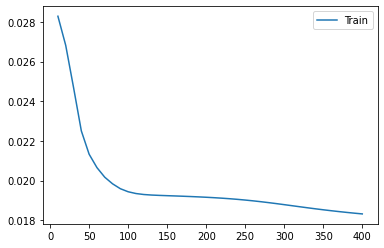

In [87]:
plt.figure()
plt.plot(epoch_train, loss_train, label='Train')
# plt.plot(epoch_valid, loss_valid, label='Validation')
plt.legend()
plt.show()

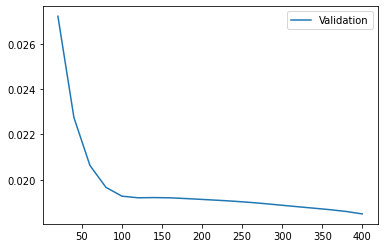

0.01849657


In [86]:
plt.figure()
# plt.plot(epoch_holder, loss_train, label='Train')
plt.plot(epoch_valid, loss_valid, label='Validation')
plt.legend()
plt.show()

print(min(loss_valid))